In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading the data**

In [ ]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
import cv2

x = []
y = []

# New size:
w = 240
h = 320

#Class 0: 0-40%
mypath = '/content/drive/MyDrive/Colab Notebooks/Master Thesis/CRL_Training/CRL_Class 0' # edit with the path to your data
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for file in files:
    label = 0
    y.append(label)
    img = cv2.imread(mypath+'/'+file)
    #img = cv2.GaussianBlur(img,(7,7),0)
    img = cv2.resize(img, dsize=(h, w), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    x.append(img)


#Class 1: 40-80%
mypath = '/content/drive/MyDrive/Colab Notebooks/Master Thesis/CRL_Training/CRL_Class 1' # edit with the path to your data
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for file in files:
    label = 1
    y.append(label)
    img = cv2.imread(mypath+'/'+file)
    #img = cv2.GaussianBlur(img1,(7,7),0)
    img = cv2.resize(img, dsize=(h, w), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    x.append(img)


#Class 2: 80-100%
mypath = '/content/drive/MyDrive/Colab Notebooks/Master Thesis/CRL_Training/CRL_Class 2' # edit with the path to your data
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for file in files:
    label = 2
    y.append(label)
    img = cv2.imread(mypath+'/'+file)
    #img = cv2.GaussianBlur(img1,(7,7),0)
    img = cv2.resize(img, dsize=(h, w), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    x.append(img)


x = np.array(x) #containing the CRL images
y = np.array(y) #containing the corresponding labels

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 3
input_shape = (h, w, 1)

# the data, split between train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle= True)

y_test_cm = y_test

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (556, 240, 320, 1)
x_test shape: (239, 240, 320, 1)
556 train samples
239 test samples


# **Simple CNN: Building and Training the model**

In [ ]:
in_shape = (w,h,1)

model = keras.Sequential(
    [
        keras.Input(shape=in_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 318, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 159, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 157, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 78, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 289536)            0         
                                                                 
 dropout (Dropout)           (None, 289536)            0

**Checking filters of the simple CNN**

In [ ]:
#first conv. layer

filters, biases = model.layers[0].get_weights()
from matplotlib import pyplot

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

filters.shape
filters1 = filters.squeeze()

In [ ]:
filters1.shape

(3, 3, 1, 32)

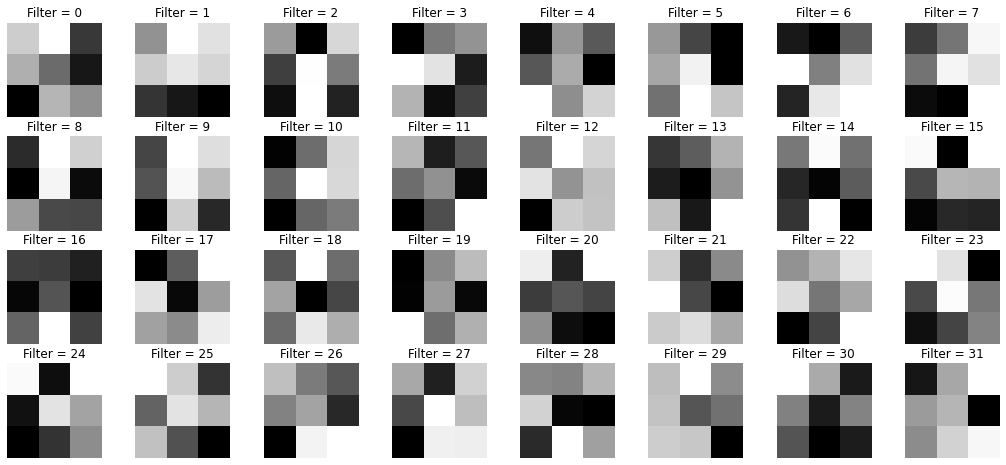

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 8))
for kfilt in range(0,32):
    ax = fig.add_subplot(4, 8, kfilt+1)
    ax.imshow(filters1[:,:,kfilt], cmap='gray') 
    ax.set_title('Filter = {}'.format(kfilt))
    ax.axis('off')

In [ ]:
#second conv. layer

filters, biases = model.layers[2].get_weights()
from matplotlib import pyplot

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

filters.shape
filters1 = filters[:,:,0,:]

In [ ]:
filters1.shape

(3, 3, 64)

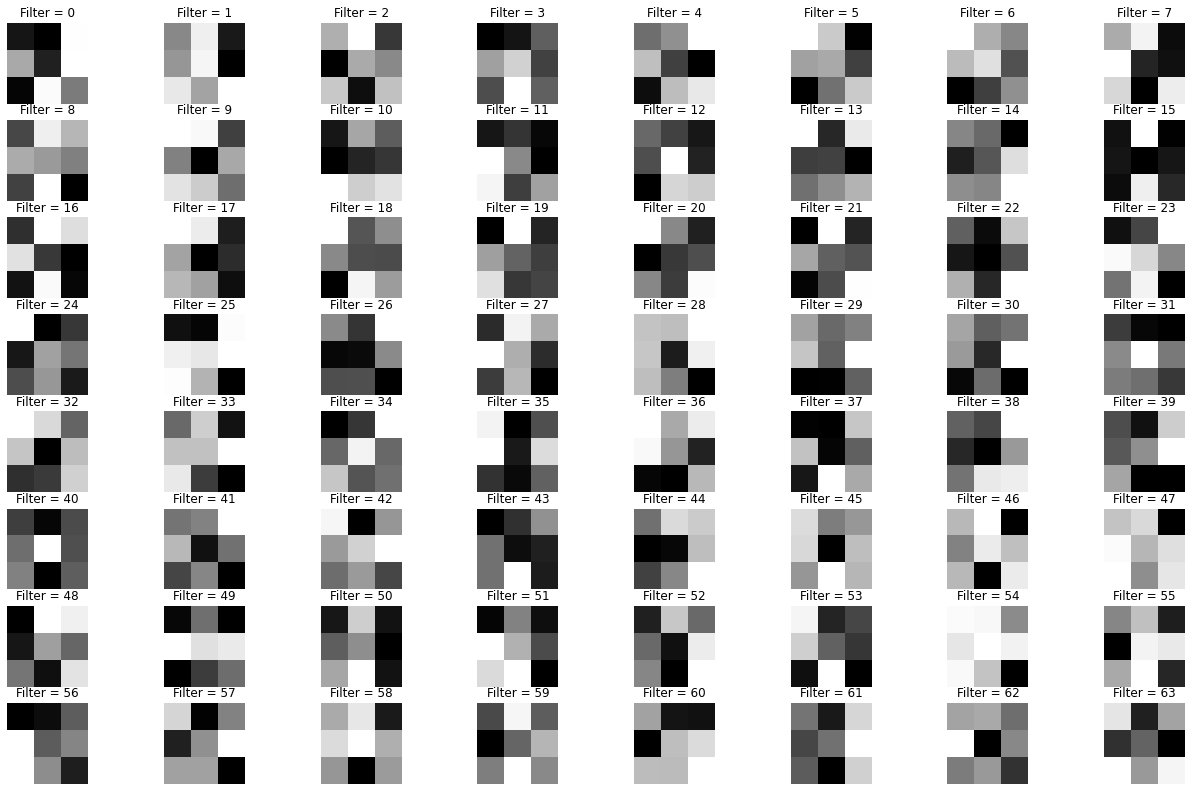

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(22, 14))
for kfilt in range(0,64):
    ax = fig.add_subplot(8, 8, kfilt+1)
    ax.imshow(filters1[:,:,kfilt], cmap='gray') 
    ax.set_title('Filter = {}'.format(kfilt))
    ax.axis('off')

first assumption was: since mainly horizontal features are highlighted in gradcam++, maybe there are some horizontal filters in the model, but it's not like that, the filters are pretty mixed (vertical and horizontal ones) --> no conclusion from the filters can be drawn

check the filters of the model for MNIST and LFW too

In [ ]:
batch_size = 20

epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

model.save('/content/drive/MyDrive/Colab Notebooks/Master Thesis/CRL models') #save the model

Epoch 1/10
28/28 [==============================] - 57s 2s/step - loss: 1.2007 - accuracy: 0.4586 - val_loss: 0.8771 - val_accuracy: 0.7029
Epoch 2/10
28/28 [==============================] - 57s 2s/step - loss: 0.6415 - accuracy: 0.7500 - val_loss: 0.5264 - val_accuracy: 0.8201
Epoch 3/10
28/28 [==============================] - 56s 2s/step - loss: 0.2691 - accuracy: 0.9227 - val_loss: 0.2777 - val_accuracy: 0.8828
Epoch 4/10
28/28 [==============================] - 56s 2s/step - loss: 0.0690 - accuracy: 0.9856 - val_loss: 0.2449 - val_accuracy: 0.9163
Epoch 5/10
28/28 [==============================] - 56s 2s/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.2482 - val_accuracy: 0.9121
Epoch 6/10
28/28 [==============================] - 57s 2s/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.2607 - val_accuracy: 0.9121
Epoch 7/10
28/28 [==============================] - 57s 2s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2685 - val_accuracy: 0.9079
Epoch 8/10
28/28 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


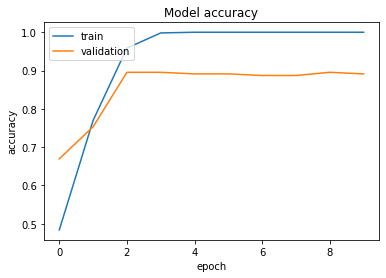

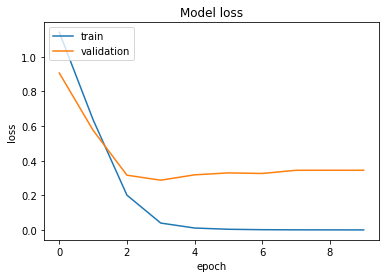

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='upper left')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#load the model again
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Master Thesis/CRL models')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3450762927532196
Test accuracy: 0.8912134170532227


              precision    recall  f1-score   support

           0       0.85      0.95      0.90        97
           1       0.89      0.83      0.86        86
           2       0.98      0.89      0.93        56

    accuracy                           0.89       239
   macro avg       0.91      0.89      0.90       239
weighted avg       0.89      0.89      0.89       239



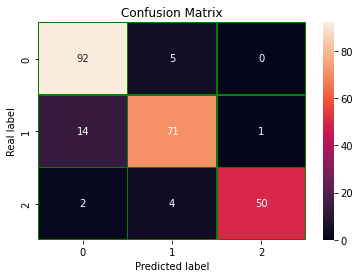

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred =  np.argmax(model.predict(x_test), axis=-1)

cm = confusion_matrix(y_test_cm,y_test_pred)

sns.heatmap(cm, annot=True, linewidths=0.5, linecolor='green', fmt='.0f')
plt.xlabel('Predicted label')
plt.ylabel('Real label')
plt.title('Confusion Matrix')

target_names = ['0','1','2']
print(classification_report(y_test_cm, y_test_pred, target_names=target_names))

# **Checking misclassified images**

In [ ]:
np.where((y_test_cm == 0)&(y_test_pred == 1)) #these images have the label 0 (worst class) but were classified as 1

(array([  0,  14,  25, 112, 187]),)

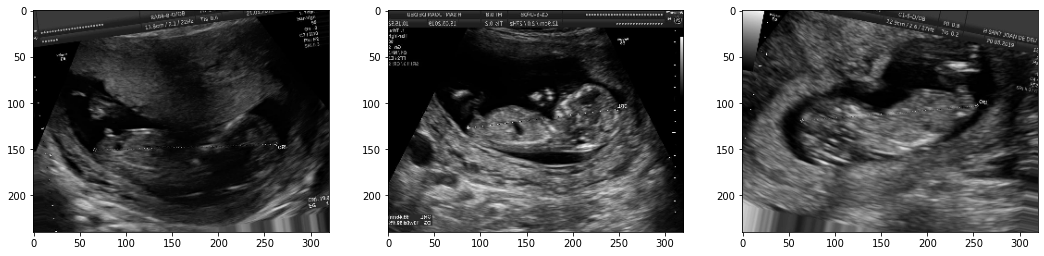

In [ ]:
mis1 = x_test[14].reshape(240,320)
mis2 = x_test[25].reshape(240,320)
mis3 = x_test[112].reshape(240,320)

fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(mis1, cmap='gray') 
#ax.set_title('img1: '+ str(image_titles[0]))
ax = fig.add_subplot(1, 3, 2)
ax.imshow(mis2, cmap='gray') 
#ax.set_title('img2: '+ str(image_titles[1]))
ax = fig.add_subplot(1,3, 3)
ax.imshow(mis3, cmap='gray') 
#ax.set_title('img3: ' + str(image_titles[2]))
plt.show()

# **DL Interpretability: GradCam**

In [ ]:
!pip install tf_keras_vis tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.3 MB/s 


In [ ]:
import tensorflow as tf

def model_modifier(current_model):
    current_model.layers[-1].activation = tf.keras.activations.linear
    return current_model

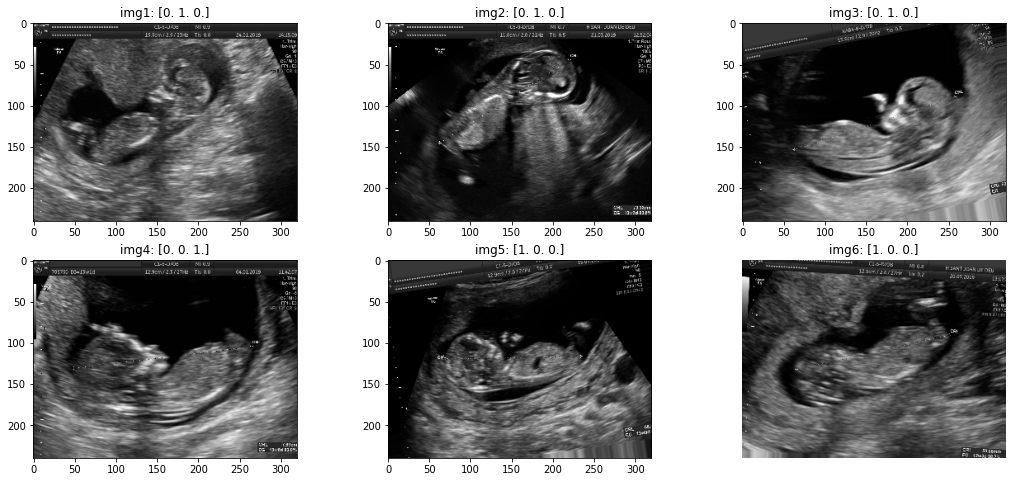

In [ ]:
# Image titles
image_titles = [y_test[0], y_test[1], y_test[6], y_test[7], y_test[8], y_test[9]]

# Load images and Convert them to a Numpy array
img1 = x_test[0].reshape(240,320)
img2 = x_test[1].reshape(240,320)
img3 = x_test[6].reshape(240,320)
img4 = x_test[7].reshape(240,320)
img5 = x_test[8].reshape(240,320)
img6 = x_test[9].reshape(240,320)

fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(2, 3, 1)
ax.imshow(img1, cmap='gray') 
ax.set_title('img1: '+ str(image_titles[0]))
ax = fig.add_subplot(2, 3, 2)
ax.imshow(img2, cmap='gray') 
ax.set_title('img2: '+ str(image_titles[1]))
ax = fig.add_subplot(2,3, 3)
ax.imshow(img3, cmap='gray') 
ax.set_title('img3: ' + str(image_titles[2]))
ax = fig.add_subplot(2,3, 4)
ax.imshow(img4, cmap='gray') 
ax.set_title('img4: ' + str(image_titles[3]))
ax = fig.add_subplot(2,3, 5)
ax.imshow(img5, cmap='gray') 
ax.set_title('img5: ' + str(image_titles[4]))
ax = fig.add_subplot(2,3, 6)
ax.imshow(img6, cmap='gray') 
ax.set_title('img6: ' + str(image_titles[5]))
ax.axis('off')
plt.show()

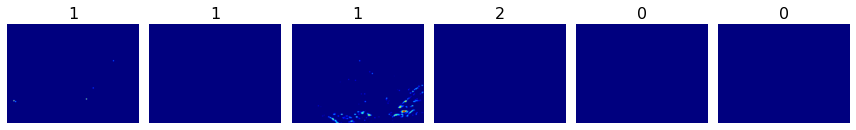

In [ ]:
from tf_keras_vis.utils.scores import CategoricalScore
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

images = np.asarray([np.array(img1), np.array(img2), np.array(img3),np.array(img4),np.array(img5),np.array(img6)])
X = images.reshape(6,240,320,1)

#images = [np.array(img1), np.array(img2), np.array(img3), np.array(img4), np.array(img5), np.array(img6)]

title1 = np.argmax(y_test[0])
title2 = np.argmax(y_test[1])
title3 = np.argmax(y_test[6])
title4 = np.argmax(y_test[7])
title5 = np.argmax(y_test[8])
title6 = np.argmax(y_test[9])

image_titles = [title1, title2, title3, title4, title5, title6]

score = CategoricalScore([title1, title2, title3, title4, title5, title6])

#Create Gradcam object
gradcam = Gradcam(model,model_modifier=model_modifier,clone=False)

#Generate heatmap with GradCAM
cam = gradcam(score, X, penultimate_layer=-1)
#cam = gradcam(score, X, penultimate_layer=-1)

#Render
f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(heatmap, cmap='jet', alpha=1) #overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()

**NEW IMAGES**

**New DL interpretability evaluation: Take 2 original images from each class and perform Grad-CAM, Grad-CAM++, Saliency Maps on them. Take the exact same images at the approach with the mask.**

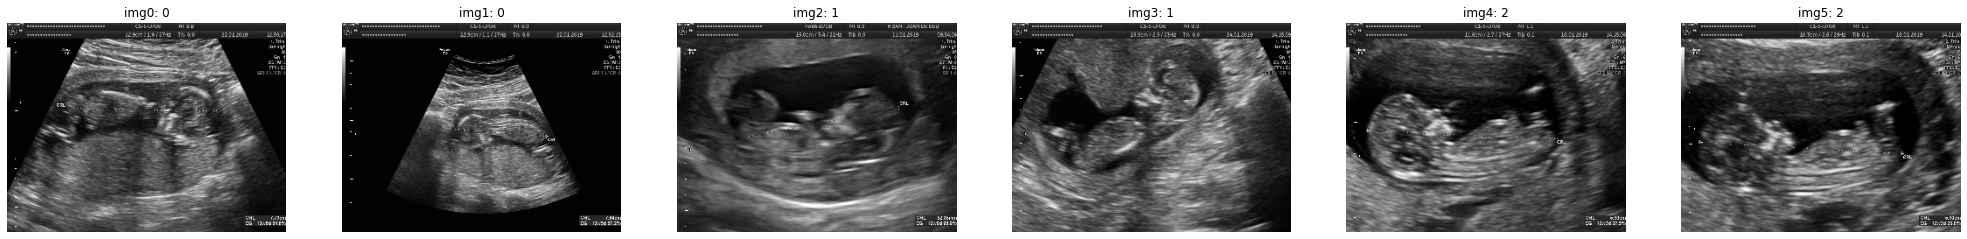

In [ ]:
from tf_keras_vis.utils.scores import CategoricalScore
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Load the images
test_img0 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL/CRL_0/95522892.jpg')
test_img0 = cv2.resize(test_img0, dsize=(h, w), interpolation=cv2.INTER_CUBIC)
test_img0 = cv2.cvtColor(test_img0, cv2.COLOR_BGR2GRAY)
test_img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL/CRL_0/95522893.jpg')
test_img1 = cv2.resize(test_img1, dsize=(h, w), interpolation=cv2.INTER_CUBIC)
test_img1 = cv2.cvtColor(test_img1, cv2.COLOR_BGR2GRAY)
test_img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL/CRL_1/94955431.jpg')
test_img2 = cv2.resize(test_img2, dsize=(h, w), interpolation=cv2.INTER_CUBIC)
test_img2 = cv2.cvtColor(test_img2, cv2.COLOR_BGR2GRAY)
test_img3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL/CRL_1/23423455.jpg')
test_img3 = cv2.resize(test_img3, dsize=(h, w), interpolation=cv2.INTER_CUBIC)
test_img3 = cv2.cvtColor(test_img3, cv2.COLOR_BGR2GRAY)
test_img4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL/CRL_2/95389671.jpg')
test_img4 = cv2.resize(test_img4, dsize=(h, w), interpolation=cv2.INTER_CUBIC)
test_img4 = cv2.cvtColor(test_img4, cv2.COLOR_BGR2GRAY)
test_img5 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL/CRL_2/95389714.jpg')
test_img5 = cv2.resize(test_img5, dsize=(h, w), interpolation=cv2.INTER_CUBIC)
test_img5 = cv2.cvtColor(test_img5, cv2.COLOR_BGR2GRAY)

test_images = np.asarray([np.array(test_img0), np.array(test_img1), np.array(test_img2), np.array(test_img3),np.array(test_img4),np.array(test_img5)])

# Scale images to the [0, 1] range
test_images = test_images.astype("float32") / 255

test_X = test_images.reshape(6,240,320,1)

#Image titles
test_image_titles = [0,0,1,1,2,2]

test_score = CategoricalScore([test_image_titles[0], test_image_titles[1], test_image_titles[2], test_image_titles[3], test_image_titles[4], test_image_titles[5]])

fig = plt.figure(figsize=(35, 20))
ax = fig.add_subplot(1, 6, 1)
ax.imshow(test_img0, cmap='gray') 
ax.set_title('img0: '+ str(test_image_titles[0]))
ax.axis('off')

ax = fig.add_subplot(1, 6, 2)
ax.imshow(test_img1, cmap='gray') 
ax.set_title('img1: '+ str(test_image_titles[1]))
ax.axis('off')

ax = fig.add_subplot(1, 6, 3)
ax.imshow(test_img2, cmap='gray') 
ax.set_title('img2: ' + str(test_image_titles[2]))
ax.axis('off')

ax = fig.add_subplot(1, 6, 4)
ax.imshow(test_img3, cmap='gray') 
ax.set_title('img3: ' + str(test_image_titles[3]))
ax.axis('off')

ax = fig.add_subplot(1, 6, 5)
ax.imshow(test_img4, cmap='gray') 
ax.set_title('img4: ' + str(test_image_titles[4]))
ax.axis('off')

ax = fig.add_subplot(1, 6, 6)
ax.imshow(test_img5, cmap='gray') 
ax.set_title('img5: ' + str(test_image_titles[5]))
ax.axis('off')
plt.show()

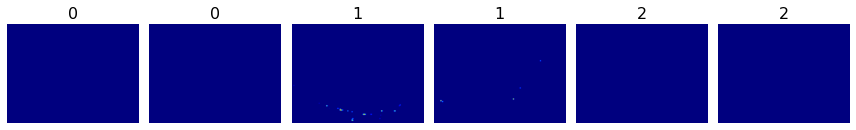

In [ ]:
from tf_keras_vis.utils.scores import CategoricalScore
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

#Create Gradcam object
gradcam = Gradcam(model,model_modifier=model_modifier,clone=False)

#Generate heatmap with GradCAM
cam = gradcam(test_score, test_X, penultimate_layer=-1)
#cam = gradcam(score, X, penultimate_layer=-1)

#Render
f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 4))
for i, title in enumerate(test_image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(heatmap, cmap='jet', alpha=1) #overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()

# **DL Interpretability: GradCam++**

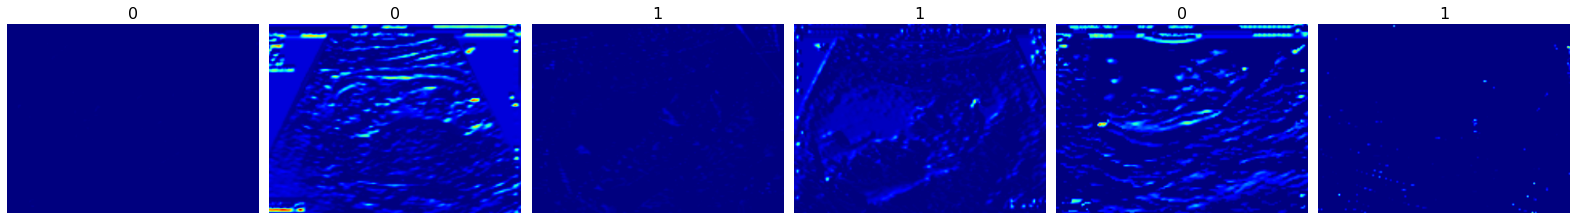

In [ ]:
from tf_keras_vis.gradcam import GradcamPlusPlus

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Create GradCAM++ object and repalce class name to "GradcamPlusPlus"
gradcamplus = GradcamPlusPlus(model,model_modifier,clone=False)

# Generate heatmap with GradCAM
camplus = gradcamplus(score, X, penultimate_layer=-1)

# Render
f, ax = plt.subplots(nrows=1, ncols=6, figsize=(22, 8))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(camplus[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(heatmap, cmap='jet', alpha=1) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()

Information at the top of the images seem to be relevant for the classification process.

**NEW IMAGES**

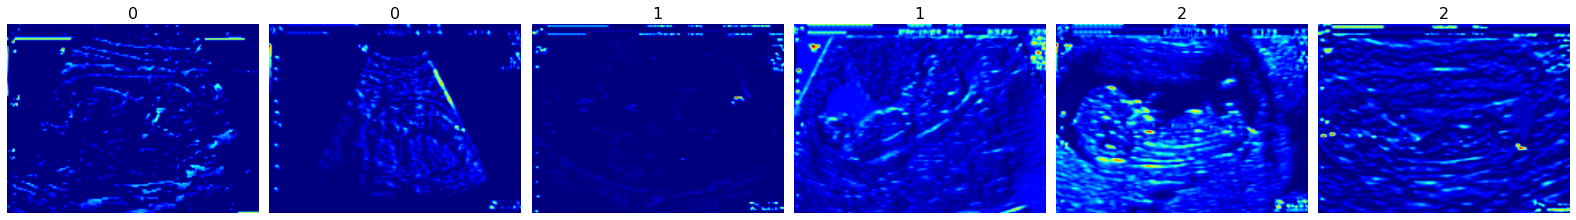

In [ ]:
from tf_keras_vis.gradcam import GradcamPlusPlus

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Create GradCAM++ object and repalce class name to "GradcamPlusPlus"
test_gradcamplus = GradcamPlusPlus(model,model_modifier,clone=False)

# Generate heatmap with GradCAM
test_camplus = test_gradcamplus(test_score, test_X, penultimate_layer=-1)

# Render
f, ax = plt.subplots(nrows=1, ncols=6, figsize=(22, 8))
for i, title in enumerate(test_image_titles):
    heatmap = np.uint8(cm.jet(test_camplus[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(heatmap, cmap='jet', alpha=1) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()

- using small filters, thats why small structures are captured

- the first class 1 image (61.5) has a higher score than the second class 1 image (46.2), but the heatmap of the second class 1 image gives more information --> the heatmaps concentrate more on distorting information in images?
- both class 2 images have a score of 100, the heatmap of the first class 2 image give a bit more information than the second one --> theory not validated 100 % --> let's check class 0 images

- both class 0 images have a score of 23.1 --> both heatmaps give same amount of information --> theory kinda true

**conclusion: globally seen, the heatmaps TEND to concentrate more on distorting information**

# **DL Interpretability: Saliency Maps**

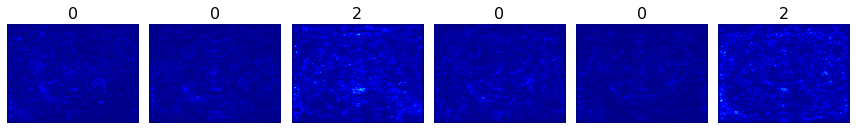

In [ ]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Create Saliency object.
saliency = Saliency(model, model_modifier=model_modifier,clone=False)

# Generate saliency map
saliency_map = saliency(score, X)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# saliency_map = normalize(saliency_map)

# Render
f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

**NEW IMAGES**

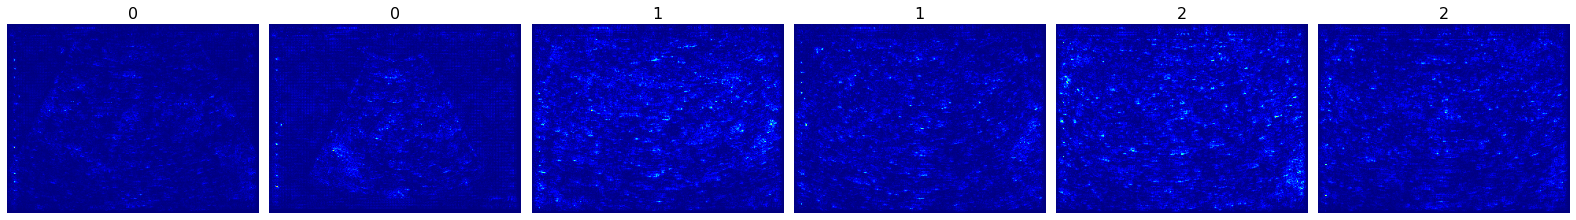

In [ ]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Create Saliency object.
saliency = Saliency(model, model_modifier=model_modifier,clone=False)

# Generate saliency map
saliency_map = saliency(test_score, test_X)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# saliency_map = normalize(saliency_map)

# Render
f, ax = plt.subplots(nrows=1, ncols=6, figsize=(22, 8))
for i, title in enumerate(test_image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

Saliency Maps does not give us much valuable information --> not really helping, it seems that Saliency Maps does not really work well for these kind of images

# **Overlaying GradCam and GradCam++ with original image**

In [ ]:
##GradCam
fig = plt.figure(figsize=(9, 13))
fig.suptitle('Overlaying results') 

original_image = img1 
mask_image = cam[0] #mask that put on the original image
          
plt.imshow(original_image)
im = plt.imshow(mask_image, cmap='jet', alpha=0.3) # sobreposo la segona imatge amb transparencia de 50% (alpha)
cbar = fig.colorbar(im, shrink=0.99, format='%.6g', pad = 0.01) # modifico el tamany de la barra de color de la imatge
cbar.ax.tick_params(labelsize=6) # modifico el tamany de les lletres de la llegenda del eix
plt.show()

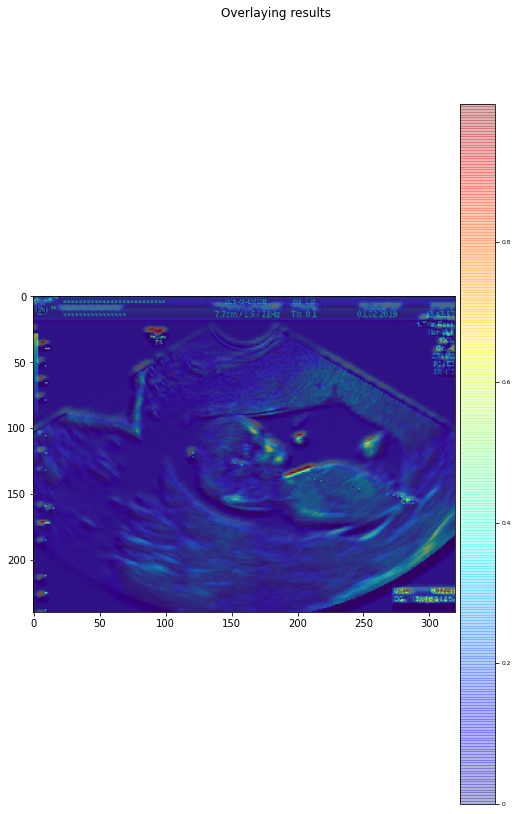

In [ ]:
##GradCam++
fig = plt.figure(figsize=(9, 13))
fig.suptitle('Overlaying results') 

original_image = img2 
mask_image = camplus[1] # selecciono mascara per sobreposar
          
plt.imshow(original_image) #mostro la imatge original
im = plt.imshow(mask_image, cmap='jet', alpha=0.3) # sobreposo la segona imatge amb transparencia de 50% (alpha)
cbar = fig.colorbar(im, shrink=0.99, format='%.6g', pad = 0.01) # modifico el tamany de la barra de color de la imatge
cbar.ax.tick_params(labelsize=6) # modifico el tamany de les lletres de la llegenda del eix
plt.show()

# **Transfer Learning: VGG16**

https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4

In [ ]:
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
import cv2

x = []
y = []

#Class 0: 0-39%
mypath = '/content/drive/MyDrive/Colab Notebooks/Master Thesis/CRL_Training/CRL_Class 0' # edit with the path to your data
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# New size:
w2 = 320
h2 = 240

######## which modifications are necessary (color channels, resizing, gaussian blur) ############
for file in files:
    label = 0
    y.append(label)
    img = cv2.imread(mypath+'/'+file)
    #img = cv2.GaussianBlur(img,(7,7),0)
    img = cv2.resize(img, dsize=(h2, w2), interpolation=cv2.INTER_CUBIC)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #3 dimensions have to be maintained
    
    
    x.append(img)


#Class 1: 40-79%
mypath = '/content/drive/MyDrive/Colab Notebooks/Master Thesis/CRL_Training/CRL_Class 1' # edit with the path to your data
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for file in files:
    label = 1
    y.append(label)
    img = cv2.imread(mypath+'/'+file)
    #img = cv2.GaussianBlur(img1,(7,7),0)
    img = cv2.resize(img, dsize=(h2, w2), interpolation=cv2.INTER_CUBIC)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    x.append(img)


#Class 2: 80-100%
mypath = '/content/drive/MyDrive/Colab Notebooks/Master Thesis/CRL_Training/CRL_Class 2' # edit with the path to your data
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for file in files:
    label = 2
    y.append(label)
    img = cv2.imread(mypath+'/'+file)
    #img = cv2.GaussianBlur(img1,(7,7),0)
    img = cv2.resize(img, dsize=(h2, w2), interpolation=cv2.INTER_CUBIC)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    x.append(img)


x = np.array(x) #containing the TN images
y = np.array(y) #containing the corresponding labels

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 3
input_shape = (h2, w2, 3)

# the data, split between train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle= True)

y_test_cm = y_test

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (556, 320, 240, 3)
556 train samples
239 test samples


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=x_train[0].shape)
base_model.trainable = False ## Not trainable weights

## Preprocessing input: normalizing input data
x_train = preprocess_input(x_train) 
x_test = preprocess_input(x_test)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

In [ ]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(90, activation='relu')
dense_layer_2 = layers.Dense(27, activation='relu')
prediction_layer = layers.Dense(3, activation='softmax')


model_vgg = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 10, 7, 512)        14714688  
                                                                 
 flatten_1 (Flatten)         (None, 35840)             0         
                                                                 
 dense_1 (Dense)             (None, 90)                3225690   
                                                                 
 dense_2 (Dense)             (None, 27)                2457      
                                                                 
 dense_3 (Dense)             (None, 3)                 84        
                                                                 
Total params: 17,942,919
Trainable params: 3,228,231
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model_vgg.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model_vgg.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

model_vgg.save('/content/drive/MyDrive/Colab Notebooks/Master Thesis/CRL models/VGG16') #save the model

Epoch 1/10
14/14 [==============================] - 443s 32s/step - loss: 2.5411 - accuracy: 0.3086 - val_loss: 1.1352 - val_accuracy: 0.4464
Epoch 2/10
14/14 [==============================] - 430s 31s/step - loss: 1.3262 - accuracy: 0.3536 - val_loss: 1.0642 - val_accuracy: 0.4464
Epoch 3/10
14/14 [==============================] - 433s 31s/step - loss: 1.1798 - accuracy: 0.3806 - val_loss: 1.1303 - val_accuracy: 0.3036
Epoch 4/10
14/14 [==============================] - 427s 31s/step - loss: 1.1764 - accuracy: 0.3288 - val_loss: 1.0983 - val_accuracy: 0.2500
Epoch 5/10
14/14 [==============================] - 428s 31s/step - loss: 1.1734 - accuracy: 0.3514 - val_loss: 1.2513 - val_accuracy: 0.3036
Epoch 6/10
14/14 [==============================] - 426s 31s/step - loss: 1.1896 - accuracy: 0.3581 - val_loss: 1.3684 - val_accuracy: 0.3036
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Master Thesis/CRL models/VGG16/assets


In [ ]:
#load the model again
model_vgg = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Master Thesis/CRL models/VGG16')

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        98
           1       0.00      0.00      0.00        85
           2       0.00      0.00      0.00        56

    accuracy                           0.41       239
   macro avg       0.14      0.33      0.19       239
weighted avg       0.17      0.41      0.24       239



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


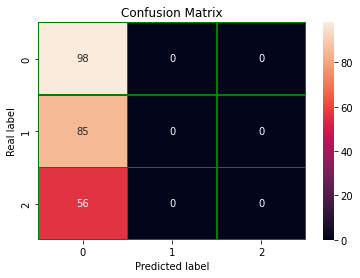

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred =  np.argmax(model_vgg.predict(x_test), axis=-1)

cm = confusion_matrix(y_test_cm,y_test_pred)

sns.heatmap(cm, annot=True, linewidths=0.5, linecolor='green', fmt='.0f')
plt.xlabel('Predicted label')
plt.ylabel('Real label')
plt.title('Confusion Matrix')


target_names = ['0','1','2']
print(classification_report(y_test_cm, y_test_pred, target_names=target_names))

VGG16 Conclusion: This problem might be too different, imagenet weights don't work for this dataset (fetal ultrasound).

Tuning: https://keras.io/guides/transfer_learning/

In [ ]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True
model_vgg.summary()

model_vgg.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

epochs = 10
model_vgg.fit(x_test, y_test, epochs=epochs, validation_data=(x_train, y_train))

# **Grad-CAM++ with VGG16**

In [ ]:
from tf_keras_vis.gradcam import GradcamPlusPlus
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Create GradCAM++ object and repalce class name to "GradcamPlusPlus"
gradcamplus = GradcamPlusPlus(model_vgg,model_modifier,clone=False)

# Generate heatmap with GradCAM
camplus = gradcamplus(score, X, penultimate_layer=-1)

# Render
f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(camplus[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(heatmap, cmap='jet', alpha=1) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()

# **Image Segmentation: K-Means**

(76800, 3)


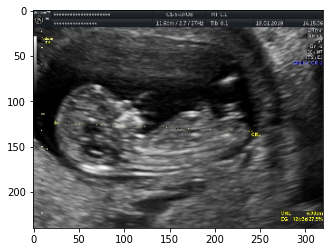

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read in the image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL/CRL_2/95389671.jpg')
image = cv2.resize(image, dsize=(h, w), interpolation=cv2.INTER_CUBIC)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

print(pixel_values.shape)

plt.imshow(image)

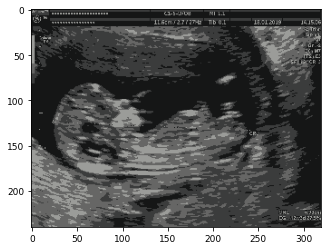

In [ ]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.8)

# number of clusters (K)
k = 4
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels]
#segmented_image = labels

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
#segmented_image.reshape(image.shape[0],image.shape[1])
# show the image
plt.imshow(segmented_image)

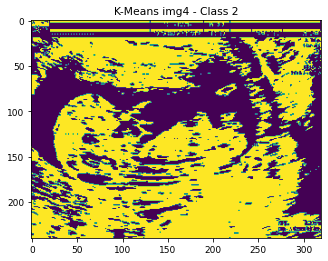

In [ ]:
#CLASS 2 image

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL/CRL_2/95389671.jpg')
image = cv2.resize(image, dsize=(h, w), interpolation=cv2.INTER_CUBIC)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

k =4

retval, labels, centers = cv2.kmeans(pixel_values,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

clustered_img = labels.reshape((image.shape[0], image.shape[1]))

clusters_to_0 = [1,3,4]

for c in clusters_to_0:
    clustered_img[clustered_img == c] = -1

clustered_img[clustered_img!=-1] = 1
clustered_img[clustered_img==-1] = 0

clustered_img
plt.imshow(clustered_img)
plt.title('K-Means img4 - Class 2')
plt.show()

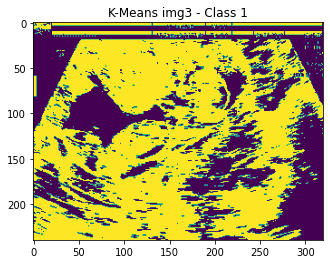

In [ ]:
#CLASS 1 image

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL/CRL_1/23423455.jpg')
image = cv2.resize(image, dsize=(h, w), interpolation=cv2.INTER_CUBIC)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.8)

k = 4

retval, labels, centers = cv2.kmeans(pixel_values,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

clustered_img = labels.reshape((image.shape[0], image.shape[1]))

clusters_to_0 = [1,3,4]

for c in clusters_to_0:
    clustered_img[clustered_img == c] = -1

clustered_img[clustered_img!=-1] = 1
clustered_img[clustered_img==-1] = 0

clustered_img
plt.imshow(clustered_img)
plt.title('K-Means img3 - Class 1')
plt.show()

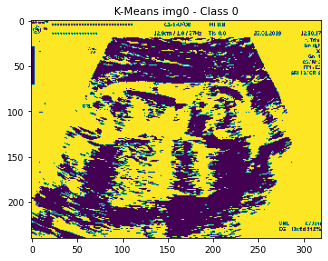

In [ ]:
#CLASS 0 image

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL/CRL_0/95522892.jpg')
image = cv2.resize(image, dsize=(h, w), interpolation=cv2.INTER_CUBIC)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

k =4

retval, labels, centers = cv2.kmeans(pixel_values,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

clustered_img = labels.reshape((image.shape[0], image.shape[1]))

clusters_to_0 = [1,3,4]

for c in clusters_to_0:
    clustered_img[clustered_img == c] = -1

clustered_img[clustered_img!=-1] = 1
clustered_img[clustered_img==-1] = 0

clustered_img
plt.imshow(clustered_img)
plt.title('K-Means img0 - Class 0')
plt.show()

# **Image Segmentation: Multi-Otsu**

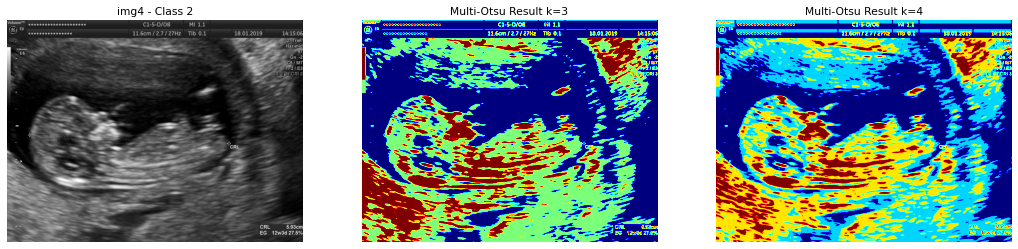

In [ ]:
#Multi-Otsu - CLASS 2 IMAGE

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.filters import threshold_multiotsu

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# The input image.
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL/CRL_2/95389671.jpg') #img4
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, classes=3)
thresholds2 = threshold_multiotsu(image, classes=4)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)
regions2 = np.digitize(image, bins=thresholds2)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('img4 - Class 2')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
#ax[1].hist(image.ravel(), bins=255)
#ax[1].set_title('Histogram with thresholds k=3')
#for thresh in thresholds:
  #  ax[1].axvline(thresh, color='r')

# Plotting the first Multi Otsu result.
ax[1].imshow(regions, cmap='jet')
ax[1].set_title('Multi-Otsu Result k=3')
ax[1].axis('off')

# Plotting the second Multi Otsu result.
ax[2].imshow(regions2, cmap='jet')
ax[2].set_title('Multi-Otsu Result k=4')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

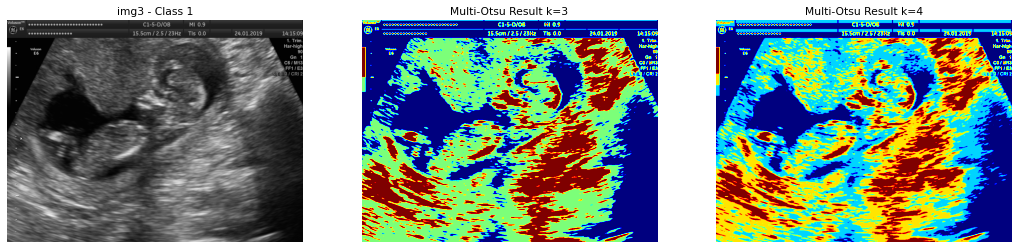

In [ ]:
#Multi-Otsu - CLASS 1 IMAGE

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.filters import threshold_multiotsu

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# The input image.
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL/CRL_1/23423455.jpg') #img3
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, classes=3)
thresholds2 = threshold_multiotsu(image, classes=4)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)
regions2 = np.digitize(image, bins=thresholds2)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('img3 - Class 1')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
#ax[1].hist(image.ravel(), bins=255)
#ax[1].set_title('Histogram with thresholds k=3')
#for thresh in thresholds:
 #   ax[1].axvline(thresh, color='r')

# Plotting the first Multi Otsu result.
ax[1].imshow(regions, cmap='jet')
ax[1].set_title('Multi-Otsu Result k=3')
ax[1].axis('off')

# Plotting the second Multi Otsu result.
ax[2].imshow(regions2, cmap='jet')
ax[2].set_title('Multi-Otsu Result k=4')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

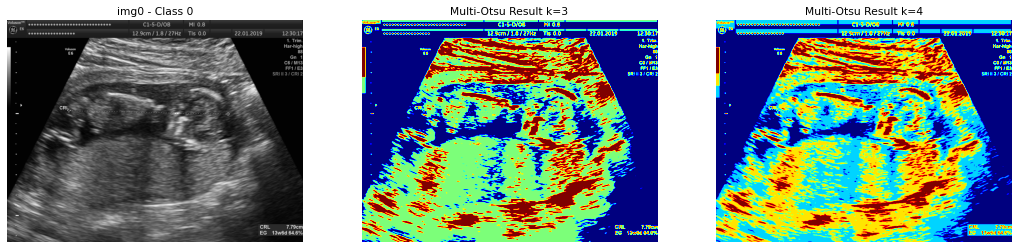

In [ ]:
#Multi-Otsu - CLASS 0 IMAGE

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.filters import threshold_multiotsu

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# The input image.
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Master Thesis/Ultrasound_fetus/CRL/CRL_0/95522892.jpg') #img0
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, classes=3)
thresholds2 = threshold_multiotsu(image, classes=4)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)
regions2 = np.digitize(image, bins=thresholds2)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('img0 - Class 0')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
#ax[1].hist(image.ravel(), bins=255)
#ax[1].set_title('Histogram with thresholds k=3')
#for thresh in thresholds:
 #   ax[1].axvline(thresh, color='r')

# Plotting the first Multi Otsu result.
ax[1].imshow(regions, cmap='jet')
ax[1].set_title('Multi-Otsu Result k=3')
ax[1].axis('off')

# Plotting the second Multi Otsu result.
ax[2].imshow(regions2, cmap='jet')
ax[2].set_title('Multi-Otsu Result k=4')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()